In [1]:
import segmentation_models_pytorch as smp
import torch
from torch import nn

In [2]:
import sys
import os

In [3]:
import rasterio
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Модель

In [5]:
sys.path.append(os.path.abspath(os.path.join('..')))
from utils.utils import tiff_to_tensor, plot_channels
from unet_pipeline.model_unet import create_unet_with_10_channels, load_unet_model
sys.path.pop()
sys.path.append(os.path.abspath(os.getcwd()))

In [6]:
# Создаем модель UNet с 10 входными каналами
model = create_unet_with_10_channels()
print(model)

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(10, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [7]:
model = load_unet_model('model.pth')

In [8]:
image = tiff_to_tensor('9_1.tif')

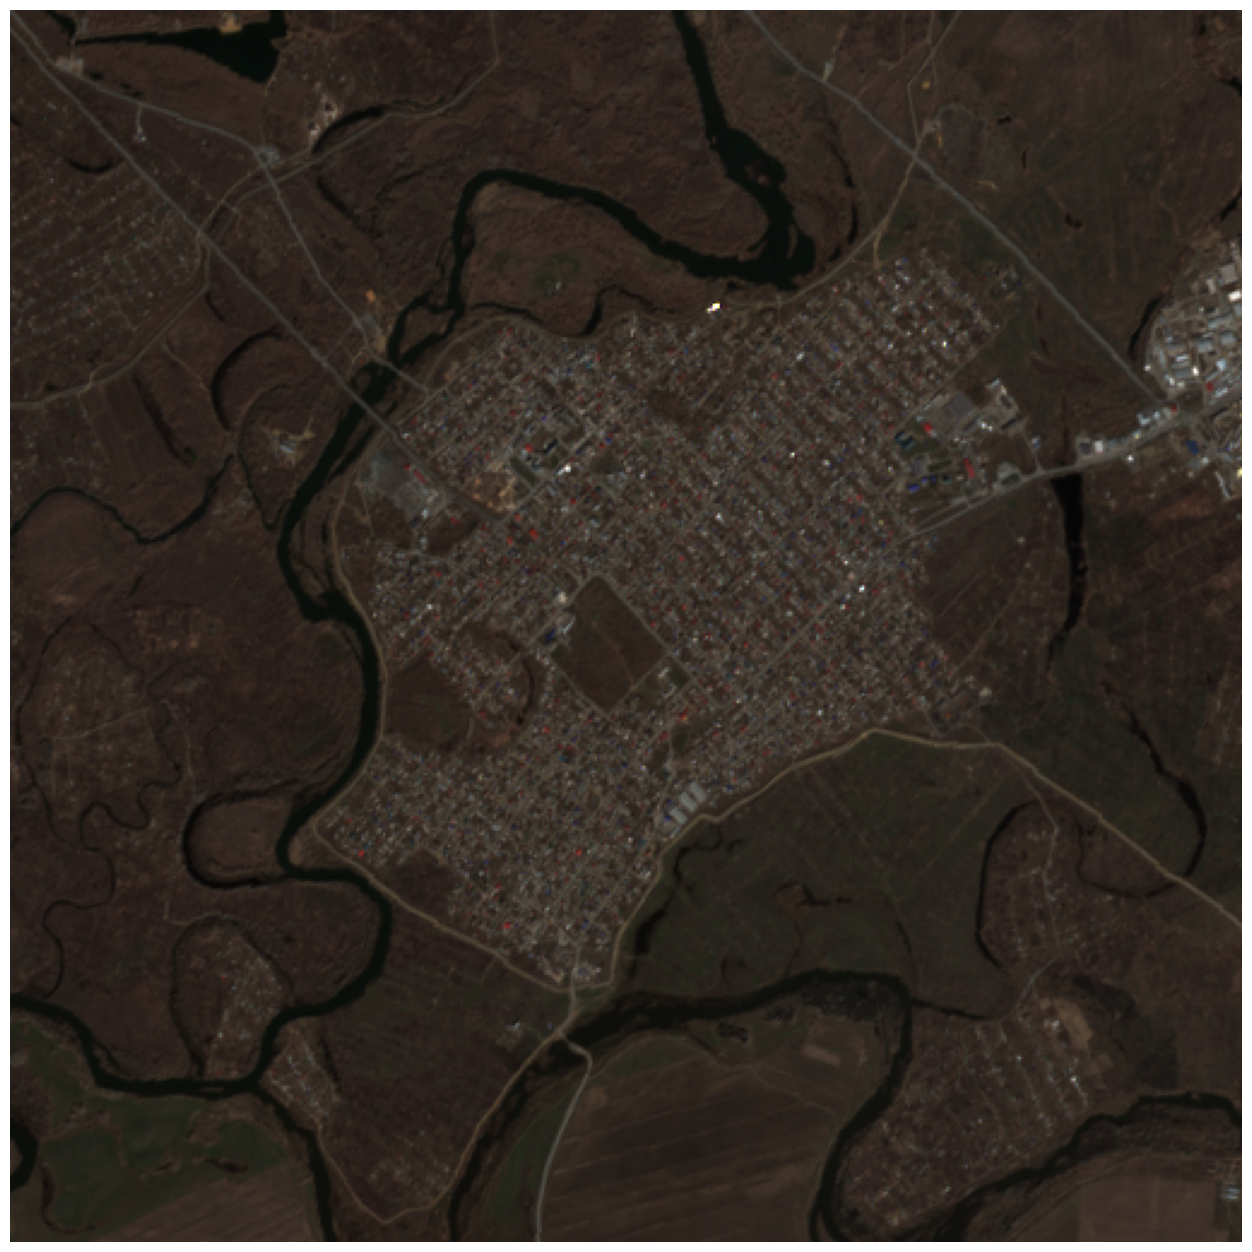

In [9]:
plot_channels(img_tensor=image)

In [10]:
pred = model(image.unsqueeze(0))

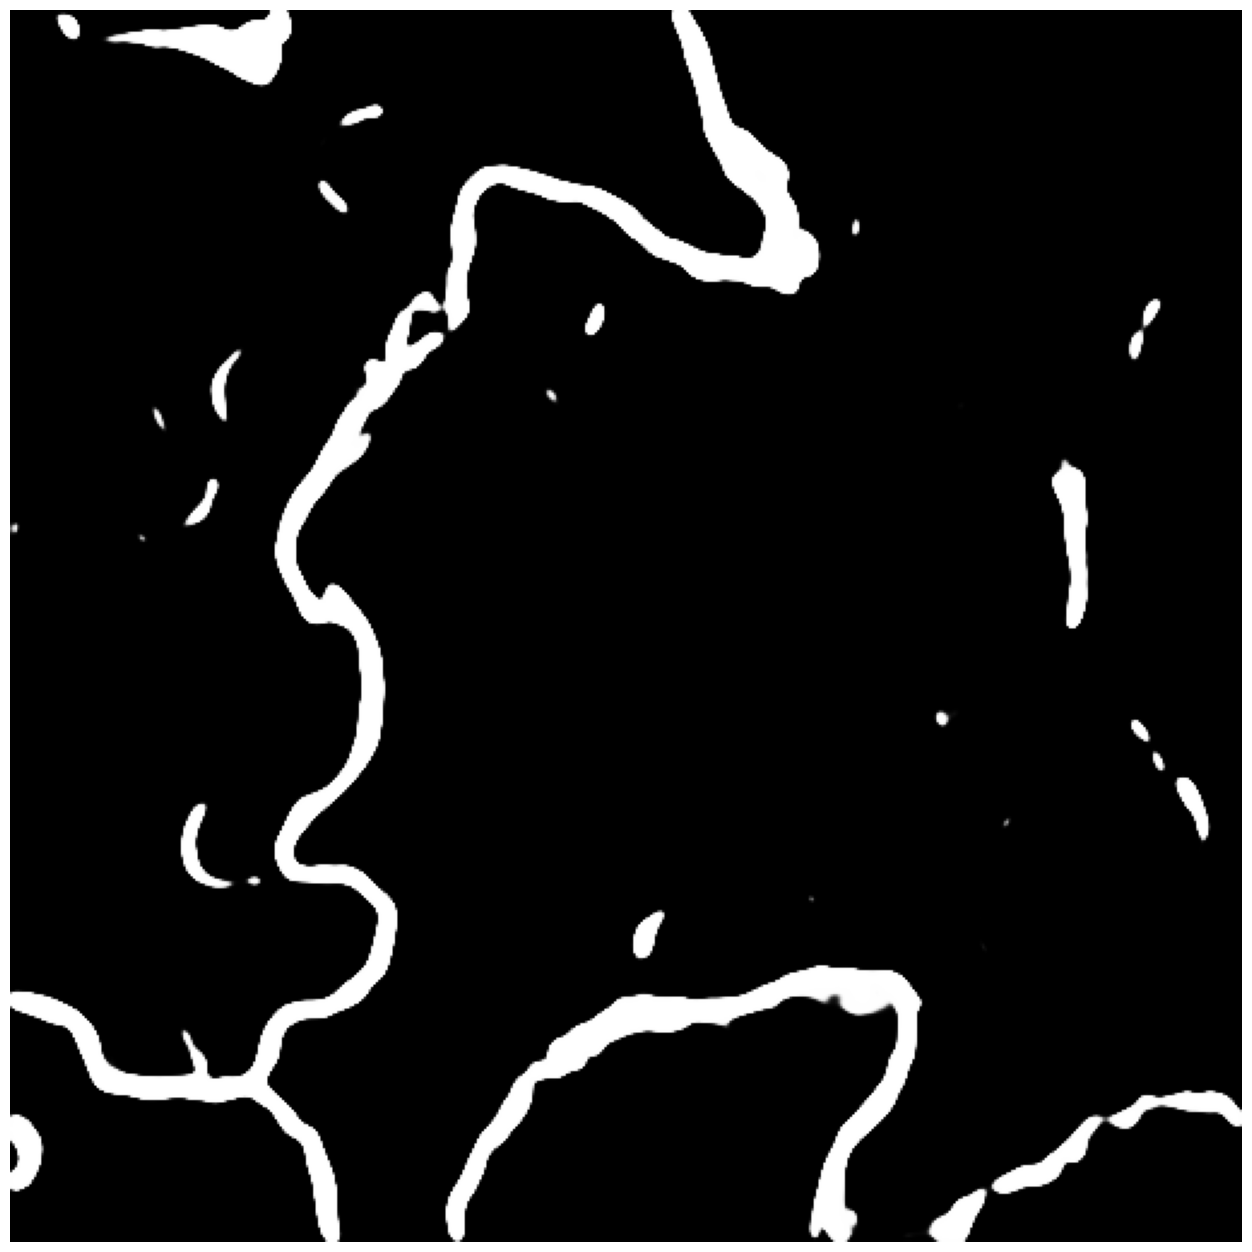

In [11]:
plot_channels(img_tensor=pred[0].detach(), rgb=[0]*3)